# HEART DISEASE PREDICTION

### Preventing Heart diseases has become more than necessary. Good data-driven systems for predicting heart diseases can improve the entire research and prevention process, making sure that more people can live healthy lives. This is where Machine Learning comes into play. Machine Learning helps in predicting the Heart diseases, and the predictions made are quite accurate.

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Load Dataset

In [2]:
x=pd.read_csv("values.csv")

In [3]:
x # x contains input features

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0


In [4]:
y=pd.read_csv("labels.csv")
y # y contains target feature

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0
...,...,...
175,5qfar3,1
176,2s2b1f,1
177,nsd00i,1
178,0xw93k,0


**Target dataset also contain common column (patient_id) which is already in input dataset , so we should drop it**

In [5]:
y.drop('patient_id',axis=1,inplace=True)

In [6]:
y

,heart_disease_present
0,0
1,0
2,1
3,1
4,0
...,...
175,1
176,1
177,1
178,0


**Now concate both Input columns and Target column**

In [7]:
df=pd.concat([x,y],axis=1)

In [8]:
df

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,5qfar3,2,reversible_defect,125,4,2,1,0,254,0.2,1,67,163,0,1
176,2s2b1f,2,normal,180,4,0,0,1,327,3.4,0,55,117,1,1
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0


**Now we have combined dataset of heart disease prediction**

## Domain Analysis

**There are 14 Input columns and 1 Target column: Heart_disease_present**
1. **patient_id** : This column is a unique and random identifier
2. **slope_of_peak_exercise_st_segment** :the slope of the peak exercise ST segment,an electrocardiography read out indicating quality of blood flow to the heart (1: upsloping, 2: fla, 32: downsloping
3. **Thal**                  : thallium heart rate (normal , fixed defect, reversible defect)
4. **resting_blood_pressure** : resting blood pressure (in mm Hg on admission to the hospital)
5. **chest_pain_type**        : (1:typical angina, 2:atypical angina, 3:non-angina pain, 4: asymptomatic)
6. **num_major_Vessels**      : no. of major vessels (0-3)
7. **fasting_blood_sugar_gt_120_mg_per_dl** : (1:true, 0:false)
8. **resting_ekg_results**    : (0: normal, 1: having ST-T wave abnormailty, 2:showing probable or definite left ventricular hypertrphy by estes'criteria)
9. **serum_cholestrol_mg_per_dl** : serum cholestoral in mg/dl
10. **oldpeak_eq_st_depression**: ST depression induced by exercise relative to rest, a measure of abnormality in electrocardiograms
11. **sex** : (0: female, 1: male)
12. **age** : age in years
13. **max_heart_rate_achieved** : maximum heart rate achieved (beats per minute)
14. **exercise_induced_angina** : exercise induced chest pain (0: False, 1: True)
15. **heart_disease_present**   : (0: No heart disease present , 1: heart disease present)
)en


## Basic Checks

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   patient_id                            180 non-null    object 
 1   slope_of_peak_exercise_st_segment     180 non-null    int64  
 2   thal                                  180 non-null    object 
 3   resting_blood_pressure                180 non-null    int64  
 4   chest_pain_type                       180 non-null    int64  
 5   num_major_vessels                     180 non-null    int64  
 6   fasting_blood_sugar_gt_120_mg_per_dl  180 non-null    int64  
 7   resting_ekg_results                   180 non-null    int64  
 8   serum_cholesterol_mg_per_dl           180 non-null    int64  
 9   oldpeak_eq_st_depression              180 non-null    float64
 10  sex                                   180 non-null    int64  
 11  age                

**Luckly there is no null values**

In [10]:
df.dtypes

patient_id                               object
slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
heart_disease_present                     int64
dtype: object

**All features are in numerical format instead of patient_id and thal, So we have to change these 2 categorical features in numerical format**

In [11]:
df.shape

(180, 15)

**There are 180 rows and 15 columns**

In [12]:
df.head(4)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0,1


In [13]:
df.tail(3)

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
177,nsd00i,2,reversible_defect,125,3,0,0,0,309,1.8,1,64,131,1,1
178,0xw93k,1,normal,124,3,2,1,0,255,0.0,1,48,175,0,0
179,2nx10r,1,normal,160,3,1,0,0,201,0.0,0,54,163,0,0


In [14]:
df.describe()

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,1.550000,131.311111,3.155556,0.694444,0.161111,1.050000,249.211111,1.010000,0.688889,54.811111,149.483333,0.316667,0.444444
std,0.618838,17.010443,0.938454,0.969347,0.368659,0.998742,52.717969,1.121357,0.464239,9.334737,22.063513,0.466474,0.498290
min,1.000000,94.000000,1.000000,0.000000,0.000000,0.000000,126.000000,0.000000,0.000000,29.000000,96.000000,0.000000,0.000000
25%,1.000000,120.000000,3.000000,0.000000,0.000000,0.000000,213.750000,0.000000,0.000000,48.000000,132.000000,0.000000,0.000000
50%,1.000000,130.000000,3.000000,0.000000,0.000000,2.000000,245.500000,0.800000,1.000000,55.000000,152.000000,0.000000,0.000000
75%,2.000000,140.000000,4.000000,1.000000,0.000000,2.000000,281.250000,1.600000,1.000000,62.000000,166.250000,1.000000,1.000000
max,3.000000,180.000000,4.000000,3.000000,1.000000,2.000000,564.000000,6.200000,1.000000,77.000000,202.000000,1.000000,1.000000


In [15]:
df.columns

Index(['patient_id', 'slope_of_peak_exercise_st_segment', 'thal',
       'resting_blood_pressure', 'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present'],
      dtype='object')

In [16]:
df['heart_disease_present'].value_counts()

heart_disease_present
0    100
1     80
Name: count, dtype: int64

**We analysed that 80 people have heart disease which is less than the non heart disease patient and data is not balanced**

## EDA

In [17]:
# First Analysis the Target variable

<Axes: xlabel='heart_disease_present', ylabel='count'>

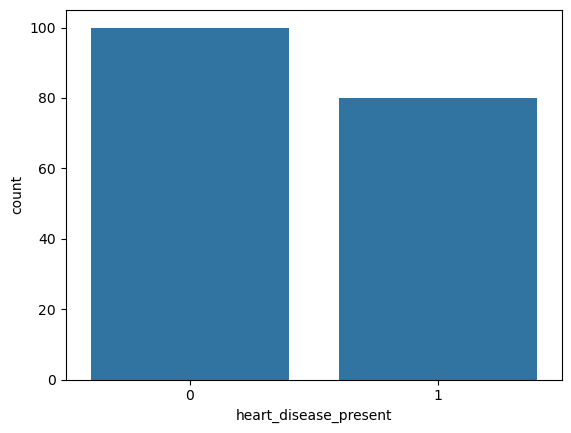

In [18]:
sns.countplot(x=df['heart_disease_present'])

**0 represnt no heart disease patient which is higher ,and 1 represent heart disease patient which less than 0**

<Axes: xlabel='sex', ylabel='count'>

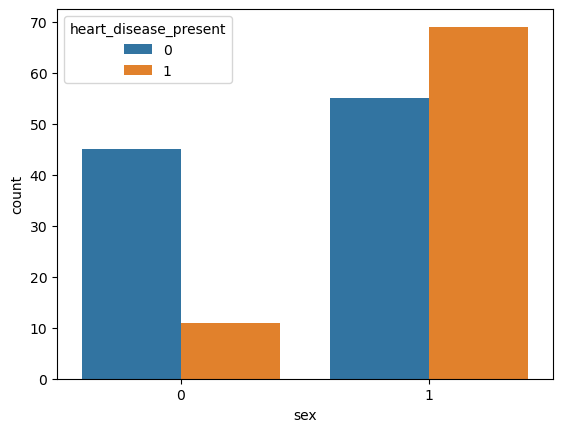

In [19]:
sns.countplot(x=df['sex'],hue=df['heart_disease_present'])

**As we can analyse that maximmum no of males have heart disease as compare to female**

In [20]:
df['sex'].value_counts()

sex
1    124
0     56
Name: count, dtype: int64

**Only 56 females have heart disease and 124 males have heart disease**

<Axes: xlabel='chest_pain_type', ylabel='heart_disease_present'>

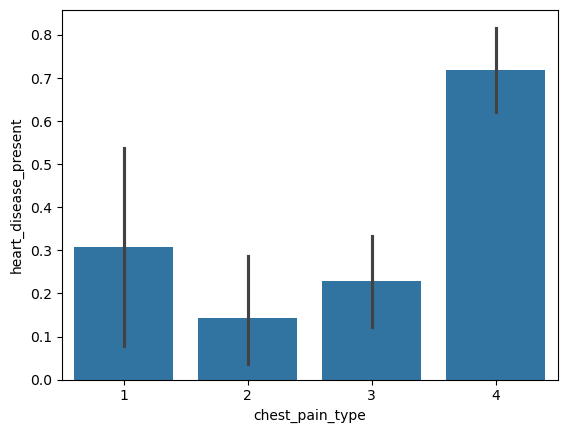

In [21]:
sns.barplot(x=df['chest_pain_type'],y=df['heart_disease_present'])

**We notice, that chest pain of '2', i.e. the ones with atypical angina are much less likely to have heart problems**

<Axes: xlabel='fasting_blood_sugar_gt_120_mg_per_dl', ylabel='heart_disease_present'>

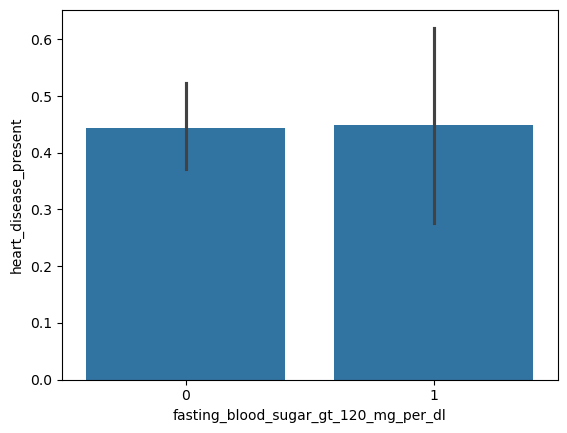

In [22]:
sns.barplot(x=df["fasting_blood_sugar_gt_120_mg_per_dl"],y=df['heart_disease_present'])

**There is not much difference in fasting blood sugar**

<Axes: xlabel='exercise_induced_angina', ylabel='heart_disease_present'>

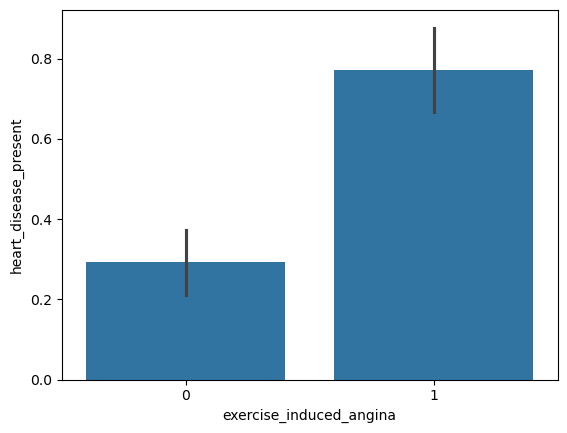

In [23]:
sns.barplot(x=df['exercise_induced_angina'],y=df['heart_disease_present'])

<Axes: xlabel='age', ylabel='Count'>

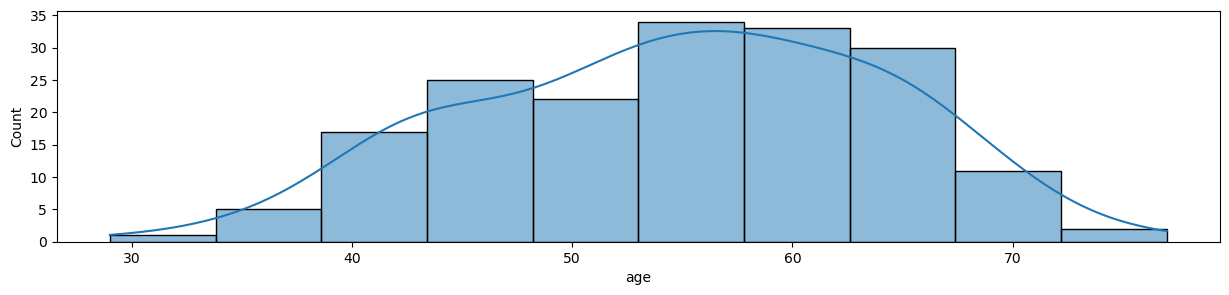

In [24]:
plt.figure(figsize=(15,3))
sns.histplot(x=df['age'],kde=True)

<Axes: xlabel='age', ylabel='count'>

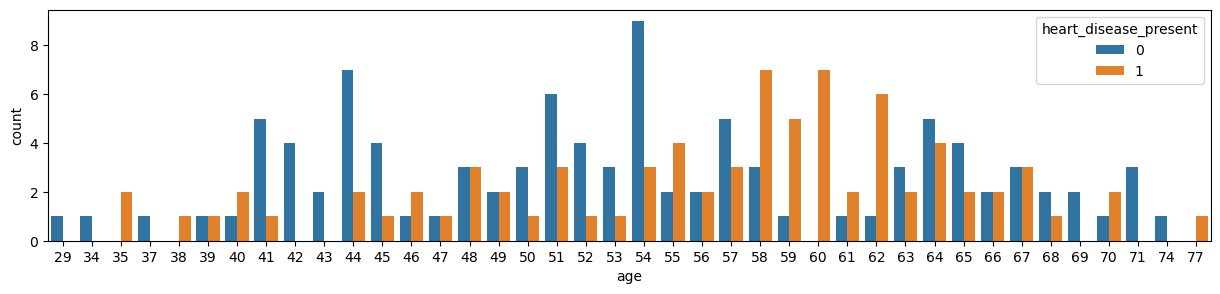

In [25]:
plt.figure(figsize=(15,3))
sns.countplot(x=df['age'],hue=df['heart_disease_present'])

**As we analysed whose age is 54 much people don't have heart disease and whose age is between 55 and 65 much people are having heart disease**

<Axes: xlabel='age', ylabel='max_heart_rate_achieved'>

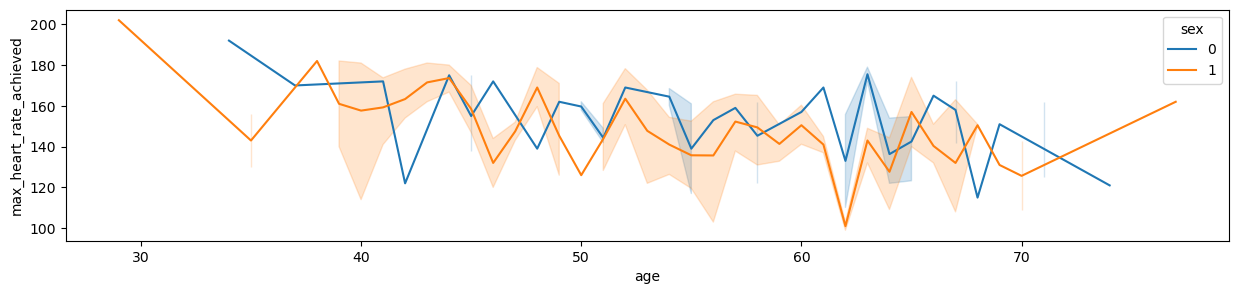

In [26]:
plt.figure(figsize=(15,3))
sns.lineplot(x=df['age'],y=df['max_heart_rate_achieved'],hue=df['sex'])

**As we can see that males whose age around 30 , their maximum heart rate is 200 wherease if we see females whose around 35, their maximum rate is near 190**

<Axes: xlabel='age', ylabel='Count'>

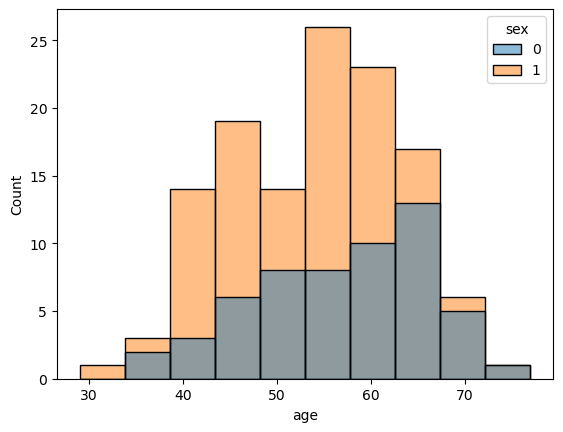

In [27]:
sns.histplot(x=df['age'],hue=df['sex'])

## Feature Engineering

**1. First we check null values**

In [28]:
df.isnull().sum()

patient_id                              0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
heart_disease_present                   0
dtype: int64

**So there are no null values**

**2. Checking outliers**

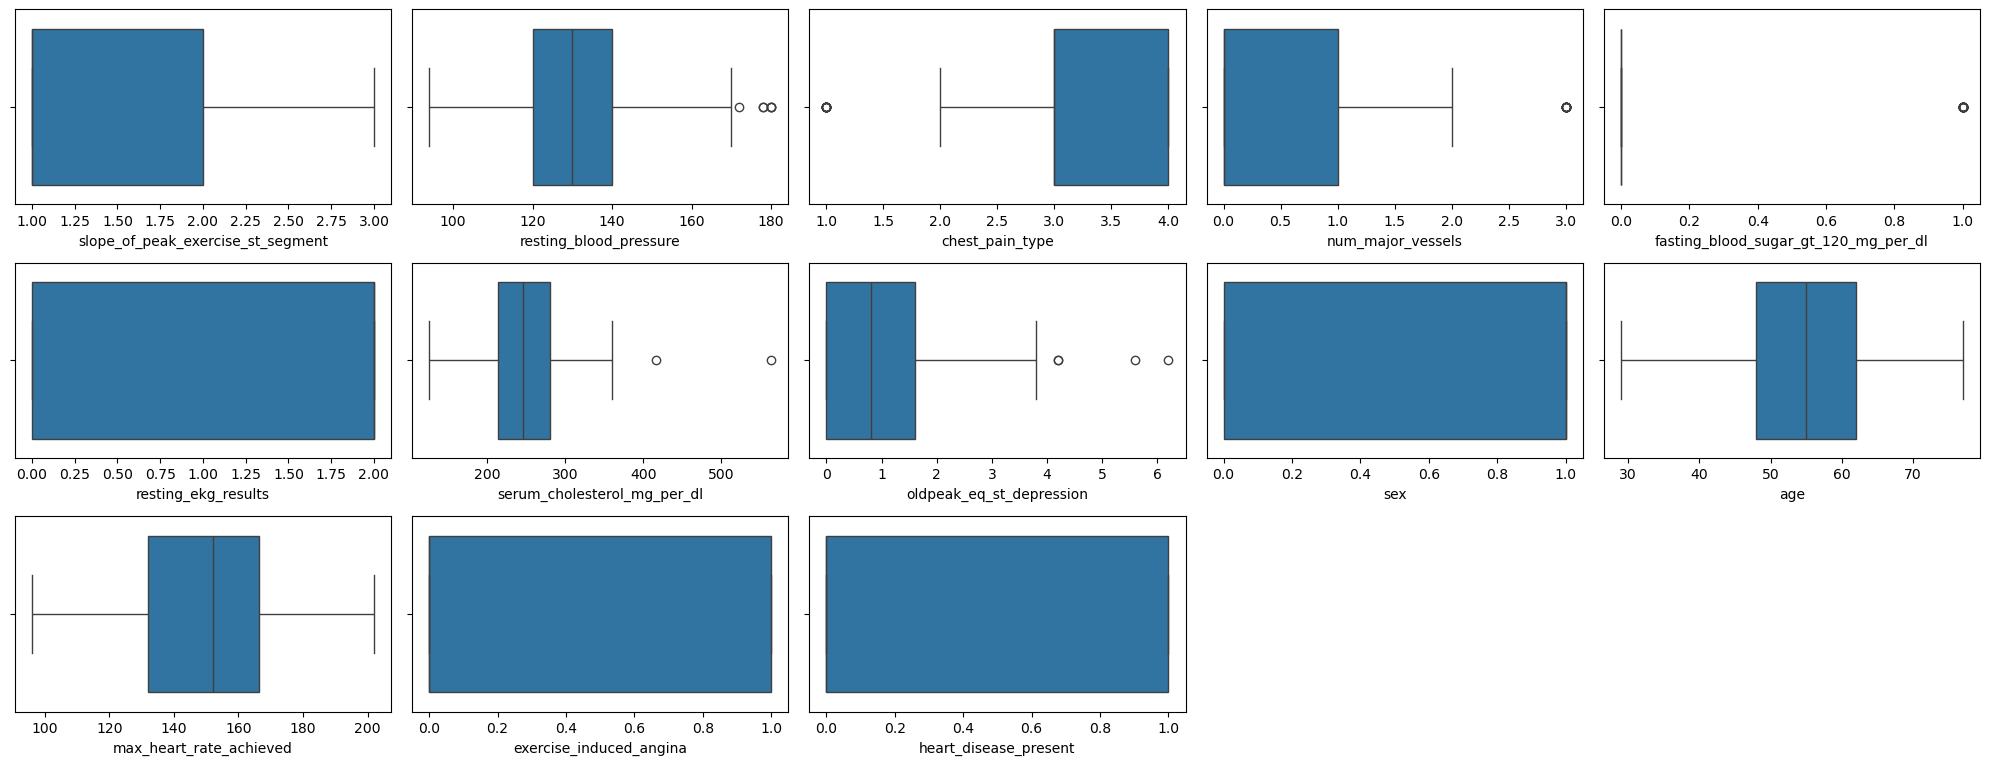

In [29]:
plt.figure(figsize=(20,20))
plotnumber=1

for i in df.drop(['patient_id','thal'],axis=1):
    if plotnumber<=13:
        ax=plt.subplot(8,5,plotnumber)
        sns.boxplot(x=df[i])
        plt.xlabel(i,fontsize=10)
    plotnumber+=1
plt.tight_layout()

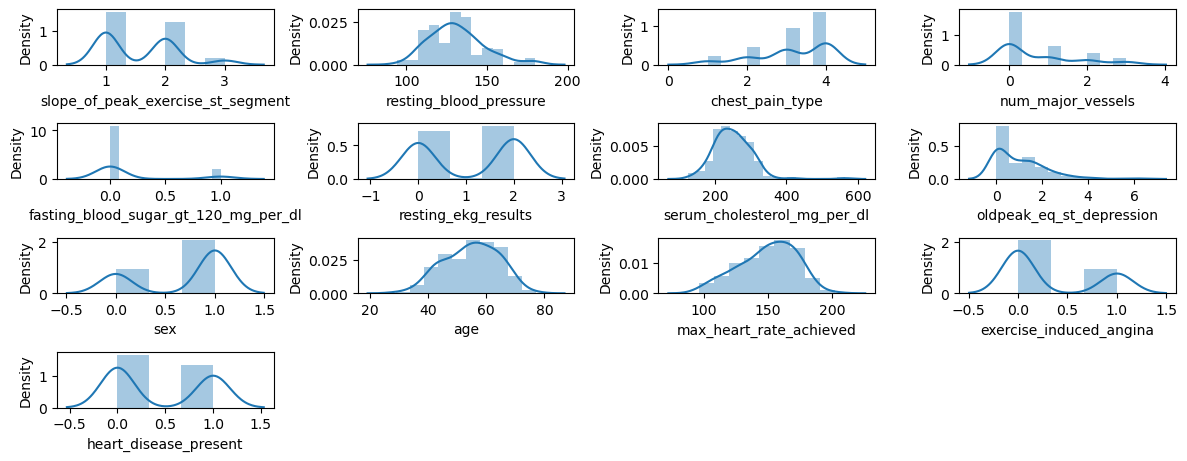

In [30]:
plt.figure(figsize=(12,10))
plotnumber = 1

for i in df.drop(columns=['patient_id','thal'],axis=1):
    if plotnumber <= 13:
        ax = plt.subplot(9,4,plotnumber)
        sns.distplot(x=df[i])
        plt.xlabel(i,fontsize=10)
    plotnumber +=1
plt.tight_layout()

**As we can see that there are no much outliers or skewness in any features , so we can ignore it**

**3. Converting categorical to numerical**

In [31]:
# There is only one feature which is in categorical: THAL , so we have to change it in numerical because ML doesn't accept categorical data

In [32]:
df['thal'].value_counts() 

thal
normal               98
reversible_defect    74
fixed_defect          8
Name: count, dtype: int64

In [33]:
# this feature contain 3 types of data , we can use one hot encoding 

In [34]:
df =pd.get_dummies(df,columns=['thal'], prefix='thal',drop_first=True)

In [35]:
df.head()

,patient_id,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,thal_normal,thal_reversible_defect
0,0z64un,1,128,2,0,0,2,308,0.0,1,45,170,0,0,True,False
1,ryoo3j,2,110,3,0,0,0,214,1.6,0,54,158,0,0,True,False
2,yt1s1x,1,125,4,3,0,2,304,0.0,1,77,162,1,1,True,False
3,l2xjde,1,152,4,0,0,0,223,0.0,1,40,181,0,1,False,True
4,oyt4ek,3,178,1,0,0,2,270,4.2,1,59,145,0,0,False,True


## Feature selection

**1. Data cleaning: dropping unwanted column**

In [36]:
df=df.drop(['patient_id'],axis=1) # because this is not necessary column for ml model

In [37]:
df.head(2)

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,heart_disease_present,thal_normal,thal_reversible_defect
0,1,128,2,0,0,2,308,0.0,1,45,170,0,0,True,False
1,2,110,3,0,0,0,214,1.6,0,54,158,0,0,True,False


In [38]:
df.columns # now we have 15 columns 

Index(['slope_of_peak_exercise_st_segment', 'resting_blood_pressure',
       'chest_pain_type', 'num_major_vessels',
       'fasting_blood_sugar_gt_120_mg_per_dl', 'resting_ekg_results',
       'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression', 'sex', 'age',
       'max_heart_rate_achieved', 'exercise_induced_angina',
       'heart_disease_present', 'thal_normal', 'thal_reversible_defect'],
      dtype='object')

**2. Correlation**

<Axes: >

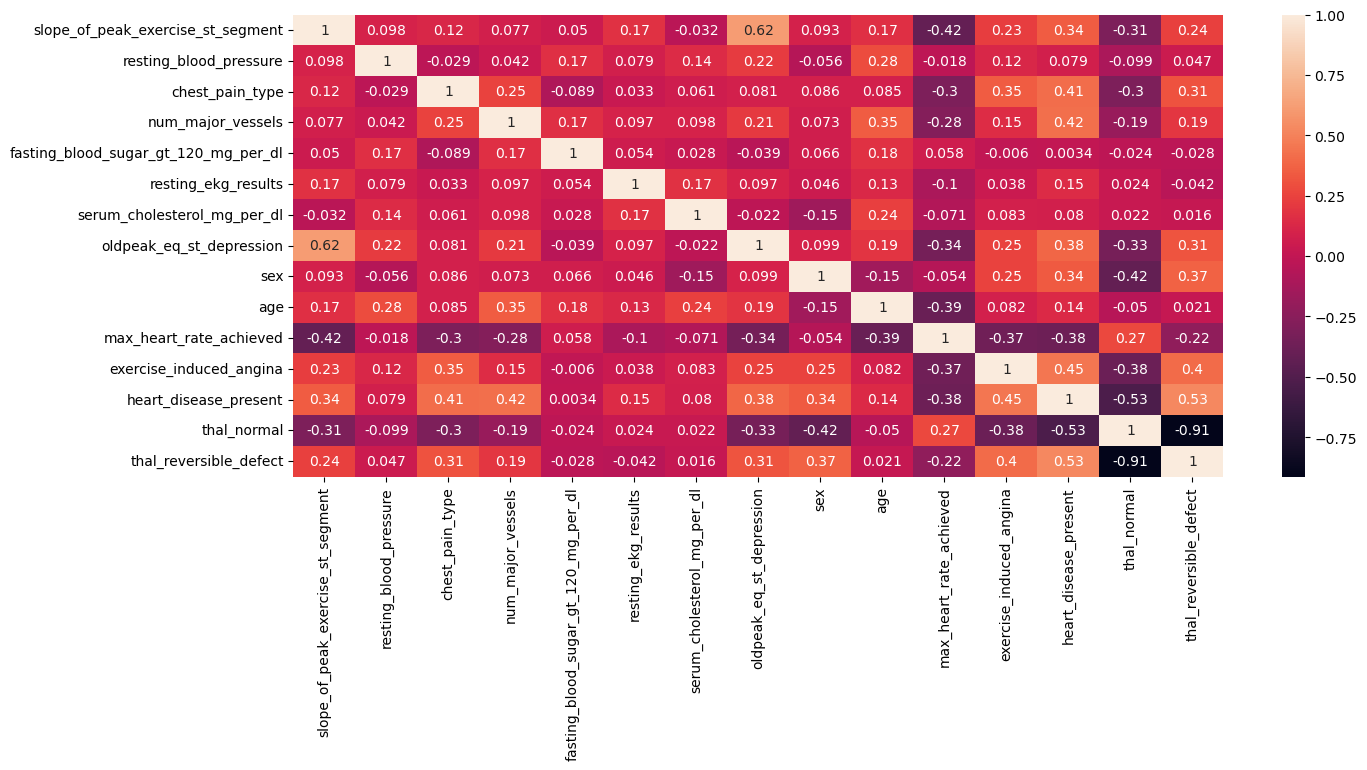

In [39]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

**As we can see that there is not much correlation shown in any feature, so there is no need to drop any column**

## Model Creation

**1. Creating Independent columns and dependent columns**

In [40]:
from sklearn.model_selection import train_test_split

x = df.drop('heart_disease_present',axis=1)
y = df['heart_disease_present']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=5)

In [41]:
x_train.shape

(126, 14)

In [42]:
y_train.shape

(126,)

In [43]:
x_test.shape

(54, 14)

In [44]:
y_test.shape

(54,)

**2. Standard Scaling**

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = pd.DataFrame(sc.fit_transform(x_train),columns=x_train.columns)
x_test = pd.DataFrame(sc.transform(x_test),columns=x_test.columns)

In [46]:
x_train.head(5)

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,thal_normal,thal_reversible_defect
0,-0.899438,0.465121,-0.166275,-0.659947,-0.394922,0.848625,-0.224223,-0.889510,0.681994,-1.032930,1.353251,-0.719772,0.908893,-0.866025
1,-0.899438,0.241009,-1.213804,1.296601,2.532146,0.848625,1.306858,-0.889510,-1.466288,0.415471,0.061511,-0.719772,0.908893,-0.866025
2,-0.899438,0.465121,-1.213804,1.296601,-0.394922,-1.188075,-0.953309,-0.889510,-1.466288,0.932757,1.307118,-0.719772,0.908893,-0.866025
3,0.674579,-0.207214,-0.166275,0.318327,-0.394922,0.848625,-0.333586,-0.534832,0.681994,0.312014,-0.030756,-0.719772,-1.100239,1.154701
4,-0.899438,0.577176,0.881255,-0.659947,-0.394922,0.848625,-0.388267,-0.889510,0.681994,-0.101815,-1.829965,1.389328,-1.100239,1.154701


In [47]:
x_test.head(5)

,slope_of_peak_exercise_st_segment,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina,thal_normal,thal_reversible_defect
0,2.248595,-0.095159,0.881255,-0.659947,2.532146,0.848625,0.650680,0.529202,0.681994,0.208557,-2.199034,1.389328,-1.100239,1.154701
1,-0.899438,-0.095159,-1.213804,-0.659947,-0.394922,0.848625,-0.515857,-0.889510,0.681994,-1.032930,1.722320,-0.719772,0.908893,-0.866025
2,-0.899438,-1.327773,0.881255,2.274875,2.532146,-1.188075,-0.260677,-0.800841,0.681994,-0.205272,-0.169156,-0.719772,-1.100239,1.154701
3,0.674579,-0.655438,-0.166275,-0.659947,-0.394922,0.848625,-0.661674,0.440533,-1.466288,1.450043,-1.645431,-0.719772,0.908893,-0.866025
4,-0.899438,-1.103661,0.881255,-0.659947,-0.394922,-1.188075,-0.789264,-0.800841,0.681994,-0.722558,-0.353691,-0.719772,0.908893,-0.866025


## Model Building

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score,classification_report

### 1. Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [50]:
y_pred_lr = lr.predict(x_test)
y_pred_lr

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

### 2. Naive Bayes

In [51]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [52]:
y_pred_nb = nb.predict(x_test)
y_pred_nb

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1], dtype=int64)

### 3. SVM

In [53]:
from sklearn import svm
sv = svm.SVC(kernel='linear')
sv.fit(x_train, y_train)

SVC(kernel='linear')

In [54]:
y_pred_svm = sv.predict(x_test)
y_pred_svm 

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0], dtype=int64)

### 4. K Nearest Neighbors

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [56]:
y_pred_knn=knn.predict(x_test)
y_pred_knn

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

### 5. Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0

for x in range(200):
    df = DecisionTreeClassifier(random_state=x)
    df.fit(x_train,y_train)
    y_pred_df = df.predict(x_test)
    current_accuracy = round(accuracy_score(y_pred_df,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
df = DecisionTreeClassifier(random_state=best_x)
df.fit(x_train,y_train)
y_pred_dt = df.predict(x_test)

In [58]:
print(y_pred_df.shape)

(54,)


### 6. Random Forest

In [97]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0

for x in range(3000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(x_train,y_train)
    y_pred_rf = rf.predict(x_test)
    current_accuracy = round(accuracy_score(y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

rf = RandomForestClassifier(random_state=best_x)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

### 7. XGBoost

In [61]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(x_train, y_train)

y_pred_xgb = xgb_model.predict(x_test)

## Evaluation

### 1. Logistic Regression

In [67]:
print("confusion matrix LR :",confusion_matrix(y_test,y_pred_lr))
print("Accuracy score LR :",accuracy_score(y_test,y_pred_lr))
print("Precision score LR :" ,precision_score(y_test,y_pred_lr))
print("F1 score LR :",f1_score(y_test,y_pred_lr))
print("Recall score LR :",recall_score(y_test,y_pred_lr))
print("Claasification Report LR :",classification_report(y_test,y_pred_lr))

confusion matrix LR : [[26  3]
 [ 6 19]]
Accuracy score LR : 0.8333333333333334
Precision score LR : 0.8636363636363636
F1 score LR : 0.8085106382978723
Recall score LR : 0.76
Claasification Report LR :               precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.86      0.76      0.81        25

    accuracy                           0.83        54
   macro avg       0.84      0.83      0.83        54
weighted avg       0.84      0.83      0.83        54



**Accuracy from Logistic Regression is 83%**

### 2. Naive Byes

In [68]:
print("confusion matrix NB :",confusion_matrix(y_test,y_pred_nb))
print("Accuracy score NB :",accuracy_score(y_test,y_pred_nb))
print("Precision score NB :" ,precision_score(y_test,y_pred_nb))
print("F1 score NB :",f1_score(y_test,y_pred_nb))
print("Recall score NB :",recall_score(y_test,y_pred_nb))
print("Claasification Report NB :",classification_report(y_test,y_pred_nb))

confusion matrix NB : [[24  5]
 [ 6 19]]
Accuracy score NB : 0.7962962962962963
Precision score NB : 0.7916666666666666
F1 score NB : 0.7755102040816326
Recall score NB : 0.76
Claasification Report NB :               precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.79      0.76      0.78        25

    accuracy                           0.80        54
   macro avg       0.80      0.79      0.79        54
weighted avg       0.80      0.80      0.80        54



### 3. SVM 

In [69]:
print("confusion matrix SVM :",confusion_matrix(y_test,y_pred_svm))
print("Accuracy score SVM :",accuracy_score(y_test,y_pred_svm))
print("Precision score SVM :" ,precision_score(y_test,y_pred_svm))
print("F1 score SVM :",f1_score(y_test,y_pred_svm))
print("Recall score SVM :",recall_score(y_test,y_pred_svm))
print("Claasification Report SVM :",classification_report(y_test,y_pred_svm))

confusion matrix SVM : [[27  2]
 [ 7 18]]
Accuracy score SVM : 0.8333333333333334
Precision score SVM : 0.9
F1 score SVM : 0.8
Recall score SVM : 0.72
Claasification Report SVM :               precision    recall  f1-score   support

           0       0.79      0.93      0.86        29
           1       0.90      0.72      0.80        25

    accuracy                           0.83        54
   macro avg       0.85      0.83      0.83        54
weighted avg       0.84      0.83      0.83        54



### 4. K Nearest Neighbors

In [70]:
print("confusion matrix KNN :",confusion_matrix(y_test,y_pred_knn))
print("Accuracy score KNN :",accuracy_score(y_test,y_pred_knn))
print("Precision score KNN :" ,precision_score(y_test,y_pred_knn))
print("F1 score KNN :",f1_score(y_test,y_pred_knn))
print("Recall score KNN :",recall_score(y_test,y_pred_knn))
print("Claasification Report KNN :",classification_report(y_test,y_pred_knn))

confusion matrix KNN : [[26  3]
 [ 9 16]]
Accuracy score KNN : 0.7777777777777778
Precision score KNN : 0.8421052631578947
F1 score KNN : 0.7272727272727273
Recall score KNN : 0.64
Claasification Report KNN :               precision    recall  f1-score   support

           0       0.74      0.90      0.81        29
           1       0.84      0.64      0.73        25

    accuracy                           0.78        54
   macro avg       0.79      0.77      0.77        54
weighted avg       0.79      0.78      0.77        54



### 5. Decision Tree

In [71]:
print("confusion matrix DT :",confusion_matrix(y_test,y_pred_dt))
print("Accuracy score DT :",accuracy_score(y_test,y_pred_dt))
print("Precision score DT :" ,precision_score(y_test,y_pred_dt))
print("F1 score DT :",f1_score(y_test,y_pred_dt))
print("Recall score DT :",recall_score(y_test,y_pred_dt))
print("Claasification Report DT :",classification_report(y_test,y_pred_dt))

confusion matrix DT : [[26  3]
 [11 14]]
Accuracy score DT : 0.7407407407407407
Precision score DT : 0.8235294117647058
F1 score DT : 0.6666666666666666
Recall score DT : 0.56
Claasification Report DT :               precision    recall  f1-score   support

           0       0.70      0.90      0.79        29
           1       0.82      0.56      0.67        25

    accuracy                           0.74        54
   macro avg       0.76      0.73      0.73        54
weighted avg       0.76      0.74      0.73        54



### 6. Random Forest

In [98]:
print("confusion matrix RF :",confusion_matrix(y_test,y_pred_rf))
print("Accuracy score RF :",accuracy_score(y_test,y_pred_rf))
print("Precision score RF :" ,precision_score(y_test,y_pred_rf))
print("F1 score RF :",f1_score(y_test,y_pred_rf))
print("Recall score RF :",recall_score(y_test,y_pred_rf))
print("Claasification Report RF :",classification_report(y_test,y_pred_rf))

confusion matrix RF : [[27  2]
 [ 6 19]]
Accuracy score RF : 0.8518518518518519
Precision score RF : 0.9047619047619048
F1 score RF : 0.8260869565217391
Recall score RF : 0.76
Claasification Report RF :               precision    recall  f1-score   support

           0       0.82      0.93      0.87        29
           1       0.90      0.76      0.83        25

    accuracy                           0.85        54
   macro avg       0.86      0.85      0.85        54
weighted avg       0.86      0.85      0.85        54



### 7. XG Boost

In [73]:
print("confusion matrix XGB :",confusion_matrix(y_test,y_pred_xgb))
print("Accuracy score XGB :",accuracy_score(y_test,y_pred_xgb))
print("Precision score XGB :" ,precision_score(y_test,y_pred_xgb))
print("F1 score XGB :",f1_score(y_test,y_pred_xgb))
print("Recall score XGB :",recall_score(y_test,y_pred_xgb))
print("Claasification Report XGB :",classification_report(y_test,y_pred_xgb))

confusion matrix XGB : [[26  3]
 [10 15]]
Accuracy score XGB : 0.7592592592592593
Precision score XGB : 0.8333333333333334
F1 score XGB : 0.6976744186046512
Recall score XGB : 0.6
Claasification Report XGB :               precision    recall  f1-score   support

           0       0.72      0.90      0.80        29
           1       0.83      0.60      0.70        25

    accuracy                           0.76        54
   macro avg       0.78      0.75      0.75        54
weighted avg       0.77      0.76      0.75        54



## Final Output

In [99]:
scores = [accuracy_score(y_test,y_pred_lr),accuracy_score(y_test,y_pred_nb),accuracy_score(y_test,y_pred_svm),accuracy_score(y_test,y_pred_knn),accuracy_score(y_test,y_pred_dt),accuracy_score(y_test,y_pred_rf),accuracy_score(y_test,y_pred_xgb)]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 0.8333333333333334 %
The accuracy score achieved using Naive Bayes is: 0.7962962962962963 %
The accuracy score achieved using Support Vector Machine is: 0.8333333333333334 %
The accuracy score achieved using K-Nearest Neighbors is: 0.7777777777777778 %
The accuracy score achieved using Decision Tree is: 0.7407407407407407 %
The accuracy score achieved using Random Forest is: 0.8518518518518519 %
The accuracy score achieved using XGBoost is: 0.7592592592592593 %


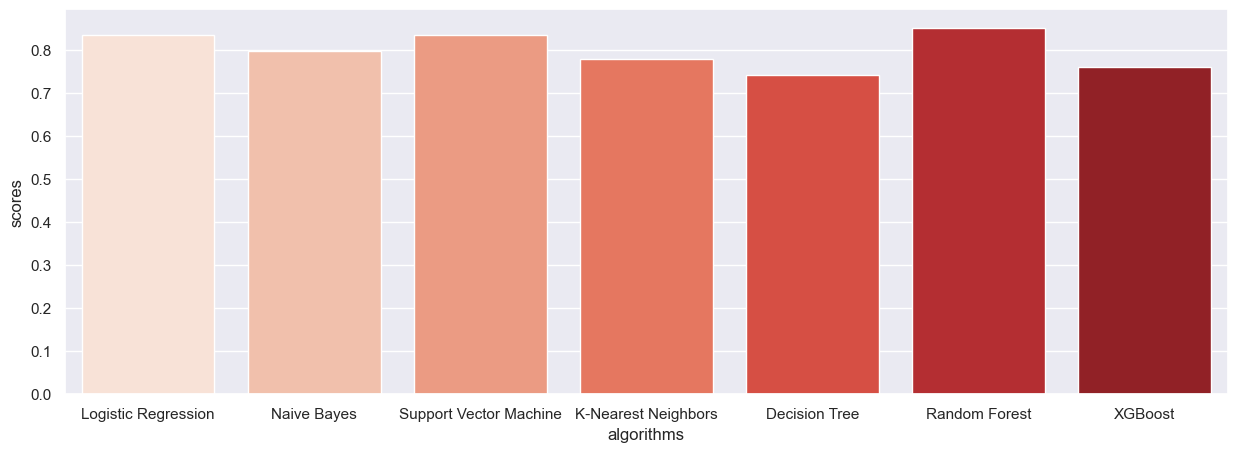

In [101]:
plt.figure(figsize=(15,5))
sns.barplot(x=algorithms, y=scores, palette='Reds')
plt.xlabel('algorithms')
plt.ylabel('scores')
plt.show()

## Conclusion

### The highest accuracy achieved using RANDOM FOREST ALGORITHM by 85%